In [1]:
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

In [2]:
centers = [[-5, 0], [-0., 6/0.3]]
X, y = make_blobs(n_samples=1000, centers=centers, random_state=4)
trafo_0 = [[.1, 0.1], [0., 3]]
trafo_1 = [[1.5, 0.], [0., 0.3]]
X[y==0] = np.dot(X[y==0], trafo_0)
X[y==1] = np.dot(X[y==1], trafo_1)

nb_points, nb_dimensions = X.shape

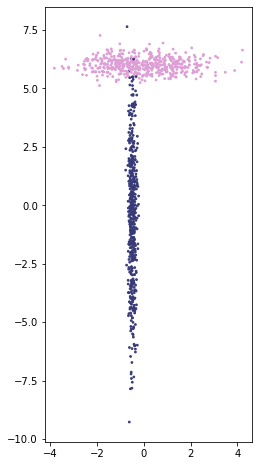

In [3]:
plt.figure(figsize=(5,8))
plt.scatter(*X.T, c=y, s=3, cmap='tab20b')
plt.gca().set_aspect('equal')

## Load class

In [4]:
import sys
sys.path.append('../')
from PreDeCon import PreDeCon

In [5]:
# Set parameters
epsilon=1; delta=0.25; mu=10; lamb=1; kappa=50

clusterer = PreDeCon(data=X, epsilon=epsilon, delta=delta, mu=mu, lamb=lamb, kappa=kappa)

In [6]:
clusterer.fit()

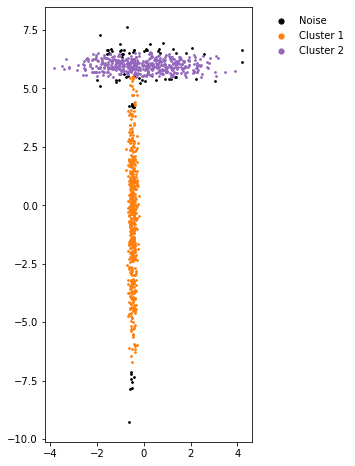

In [7]:
plt.figure(figsize=(5,8))
colors = {-1: 'k', 0: 'tab:orange', 1: 'tab:purple', 2: 'tab:red'}
label_names = {-1: 'Noise', 0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}
for label_id in np.unique(clusterer.labels_).astype(int):
    plt.scatter(*X[clusterer.labels_==label_id].T, c=colors[label_id], s=3, label=label_names[label_id])
plt.gca().set_aspect('equal')
plt.legend(frameon=False, markerscale=3, bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## Elki solution
Solution using the PreDeCon algorithm implemented in Elki & with the same parameters

<img src="elki_result.png" width="500">